# Поиск и выбор набора данных для построения моделей машинного обучения.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
sns.set(style="ticks")

In [26]:
data = pd.read_csv('heart.csv', encoding='cp1251', sep=',')

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [27]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


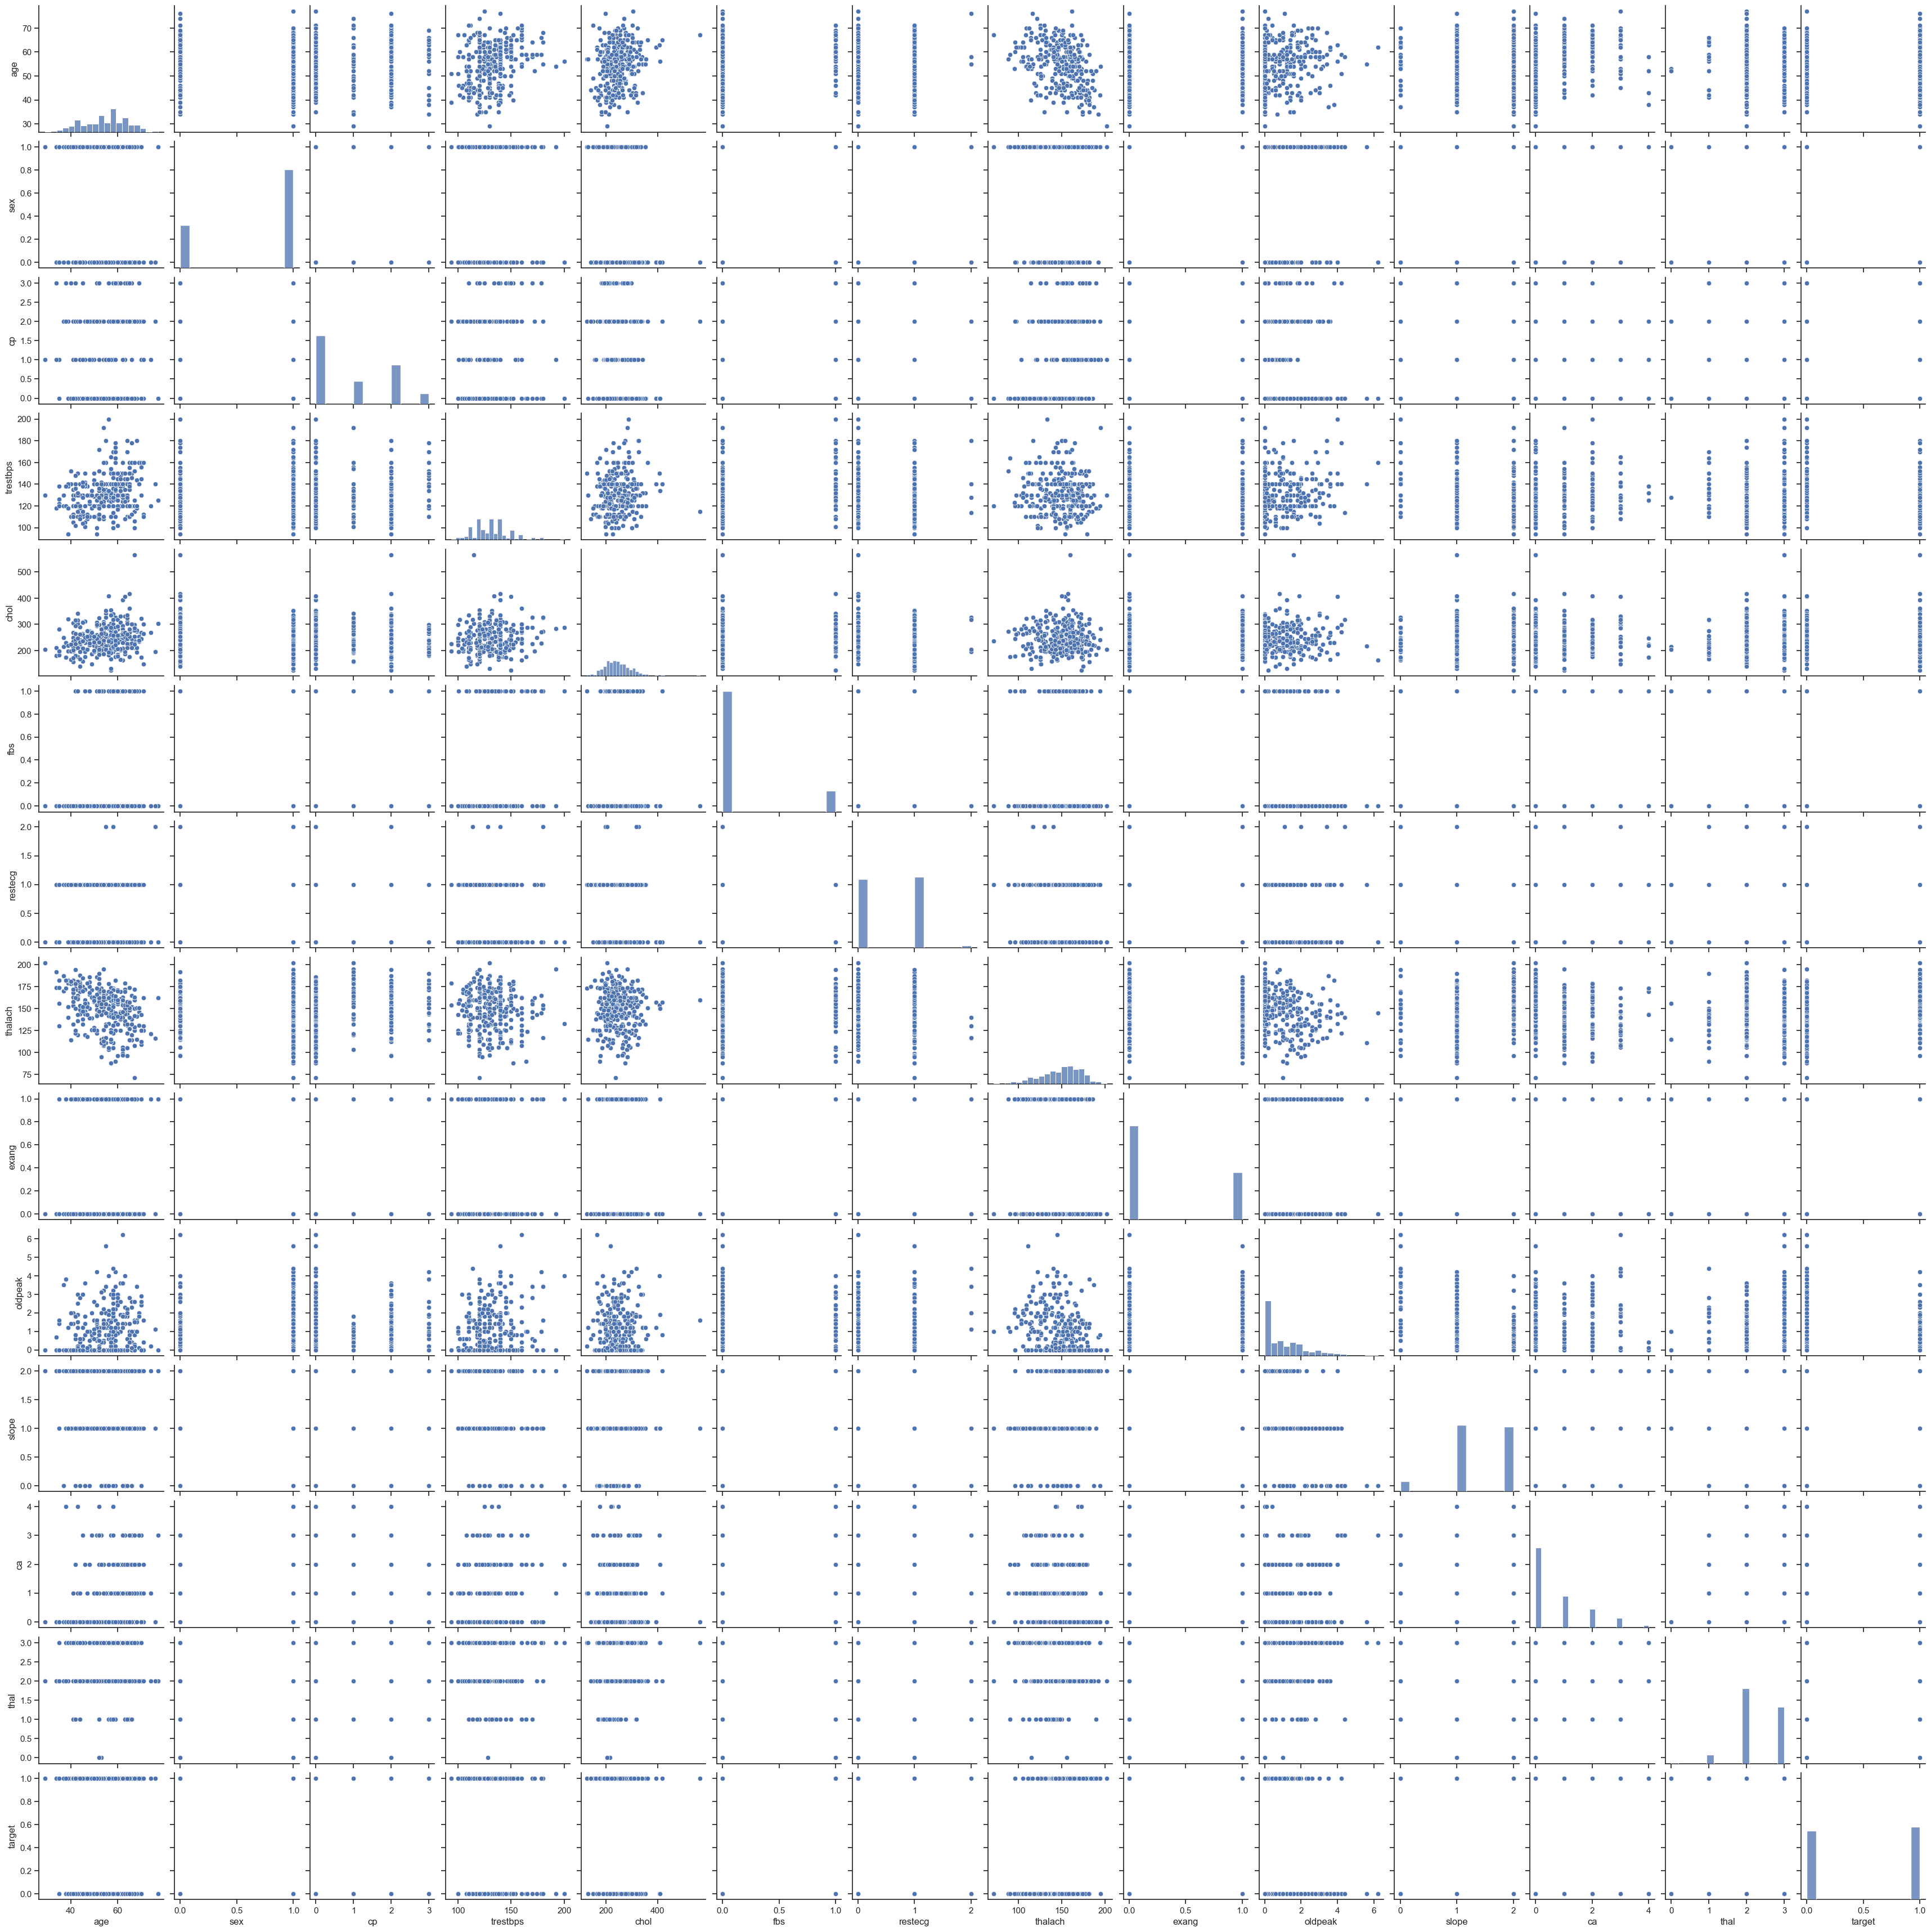

In [30]:
sns.pairplot(data)

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [31]:
scale_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

In [32]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [33]:
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]


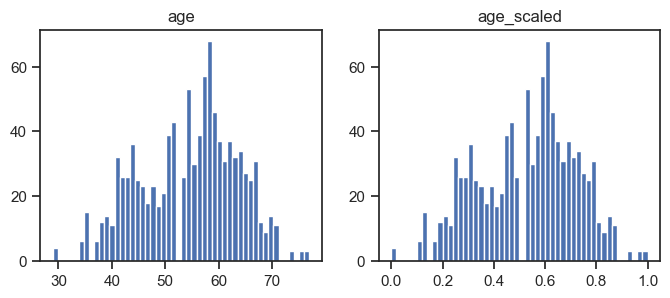

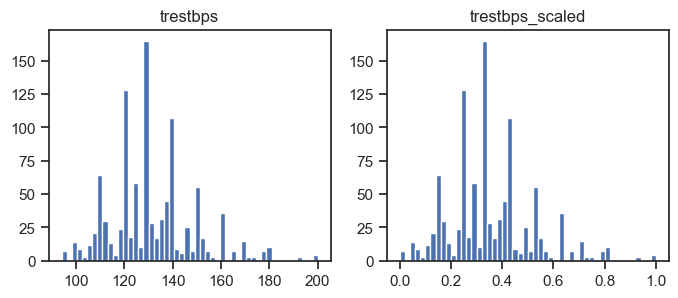

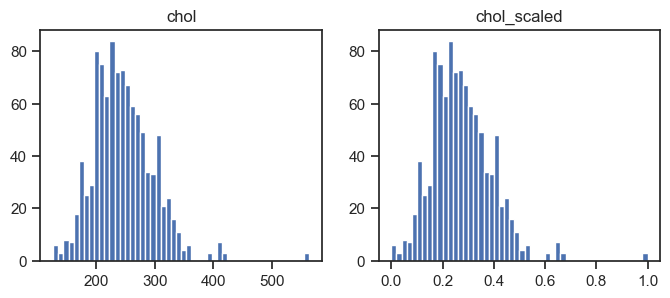

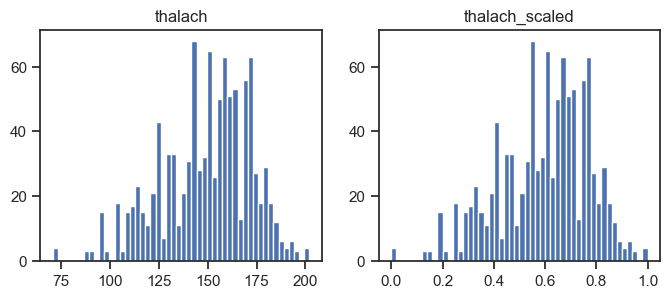

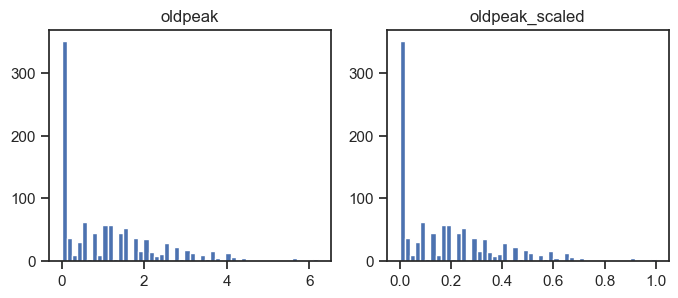

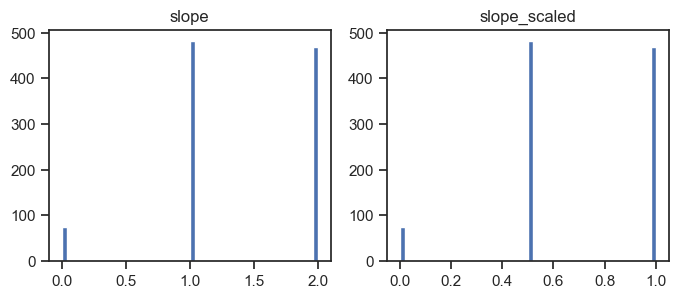

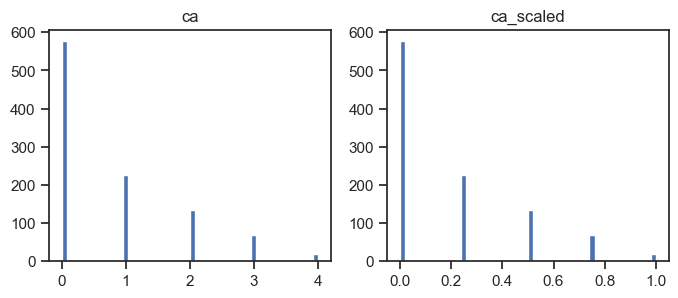

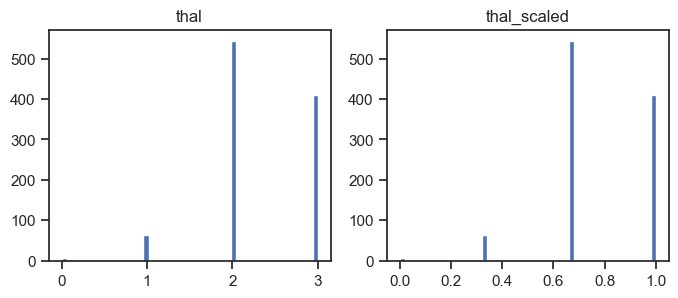

In [34]:
scale_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

<Axes: >

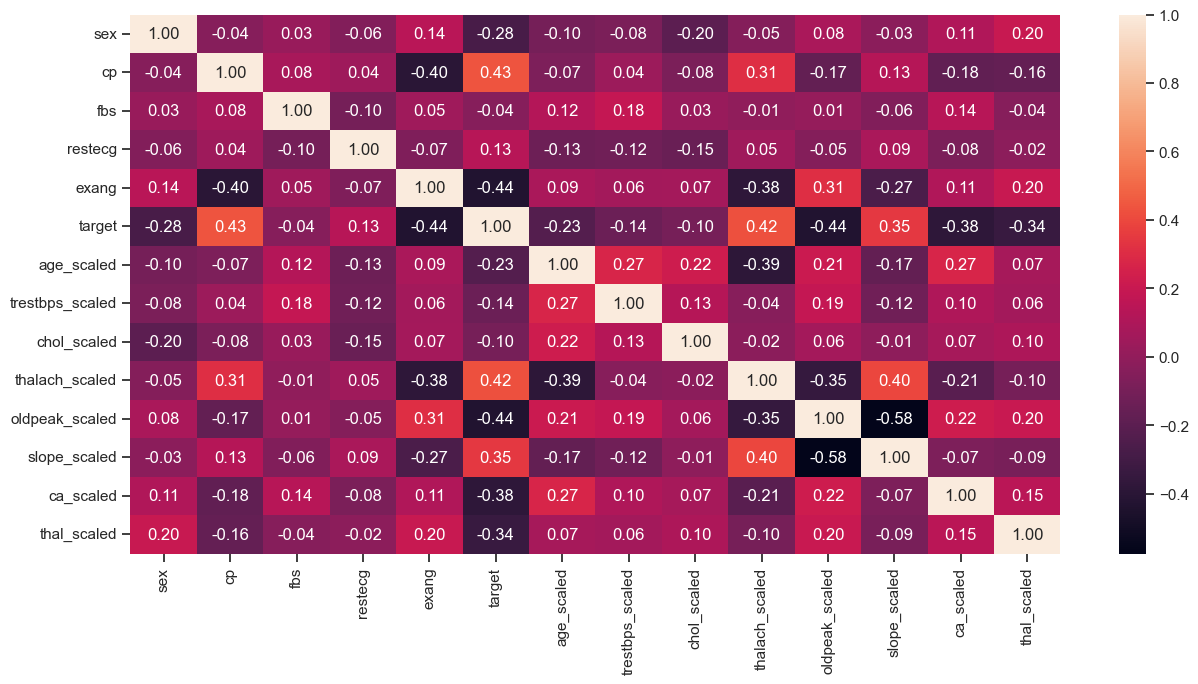

In [35]:
data = data.drop(scale_cols, axis=1)
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## За целевой признак возьмем oldpeak, т.к. у него имеется наибольшая корреляция с некоторыми признаками (slope(-0.58) и target(-0.44)). На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

# Выбор метрик для последующей оценки качества моделей. 

### Mean absolute error - средняя абсолютная ошибка
### Mean squared error - средняя квадратичная ошибка
### R2 - коэффициент детерминации

#### MAE и MSE взяты как как важен показатель ошибки, R2 так как важно количество отклонений в прогнозах, объясненных набором данных.

# Выбор наиболее подходящих моделей для решения задачи регрессии.

#### Линейная регрессия
#### Метод ближайших соседей
#### Метод опорных векторов
#### Решающее дерево
#### Случайный лес
#### Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [36]:
data_dict = {"slope_scaled": data['slope_scaled'], "target": data['target']}

df_scaled = pd.DataFrame(data_dict)

X_train, X_test, y_train, y_test = train_test_split(df_scaled, data['oldpeak_scaled'], random_state=1)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((768, 2), (768,), (257, 2), (257,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [38]:
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [39]:
regrMetricLogger = pd.DataFrame(columns=['ModelName', 'MetricName', 'Value'])

In [40]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MAE', mae]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'MSE', mse]
    regrMetricLogger.loc[len(regrMetricLogger)] = [model_name, 'R2', r2]
   
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [41]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=0.114, MSE=0.022, R2=0.386
KNN_5 	 MAE=0.142, MSE=0.035, R2=0.018
SVR 	 MAE=0.12, MSE=0.021, R2=0.402
Tree 	 MAE=0.114, MSE=0.021, R2=0.422
RF 	 MAE=0.114, MSE=0.021, R2=0.422
GB 	 MAE=0.114, MSE=0.021, R2=0.422


# Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [42]:
n_range = np.array(range(1,100,10))
tuned_parameters = [{'n_neighbors': n_range}]
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(X_train, y_train)
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=31)

In [43]:
regr_gs.best_params_

{'n_neighbors': 31}

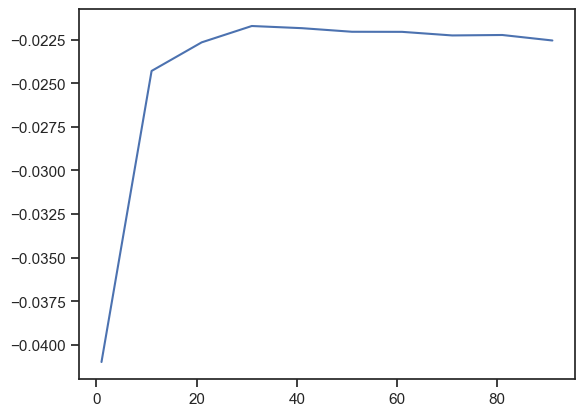

In [44]:
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

In [45]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+'31'):regr_gs.best_estimator_}

In [46]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_5 	 MAE=0.142, MSE=0.035, R2=0.018
KNN_31 	 MAE=0.112, MSE=0.021, R2=0.406


In [47]:
param_grid_knn = {"n_neighbors": range(3, 35), "weights": ["uniform", "distance"]}
grid_search_knn = GridSearchCV(
    estimator=KNeighborsRegressor(), param_grid=param_grid_knn, scoring="r2", cv=5
)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Оценка лучшей модели KNN
Y_pred_knn = best_model_knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, Y_pred_knn)
mse_knn = mean_squared_error(y_test, Y_pred_knn)
r2_knn = r2_score(y_test, Y_pred_knn)
print(
    "Best Model (KNN) \t MAE={}, MSE={}, R2={}".format(
        round(mae_knn, 3), round(mse_knn, 3), round(r2_knn, 3)
    )
)
regr_train_model('KNN_5',KNeighborsRegressor(n_neighbors=5), regrMetricLogger)

Best Model (KNN) 	 MAE=0.111, MSE=0.021, R2=0.408
KNN_5 	 MAE=0.142, MSE=0.035, R2=0.018


In [48]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "max_features": ["sqrt", "log2"],
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(), param_grid=param_grid, scoring="r2", cv=5
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Оценка лучшей модели
Y_pred = best_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, Y_pred)
mse_rf = mean_squared_error(y_test, Y_pred)
r2_rf = r2_score(y_test, Y_pred)
print(
    "Best Model (Random Forest) \t MAE={}, MSE={}, R2={}".format(
        round(mae_rf, 3), round(mse_rf, 3), round(r2_rf, 3)
    )
)
regr_train_model('RF',RandomForestRegressor(), regrMetricLogger)

Best Model (Random Forest) 	 MAE=0.114, MSE=0.021, R2=0.422
RF 	 MAE=0.114, MSE=0.021, R2=0.422


In [49]:
# SVR
param_grid_svr = {
    "kernel": ["linear", "poly", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.01, 0.1, 1],
}
grid_search_svr = GridSearchCV(
    estimator=SVR(), param_grid=param_grid_svr, scoring="r2", cv=5
)
grid_search_svr.fit(X_train, y_train)
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

# Оценка лучшей модели SVR
Y_pred_svr = best_model_svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, Y_pred_svr)
mse_svr = mean_squared_error(y_test, Y_pred_svr)
r2_svr = r2_score(y_test, Y_pred_svr)
print(
    "Best Model (SVR) \t MAE={}, MSE={}, R2={}".format(
        round(mae_svr, 3), round(mse_svr, 3), round(r2_svr, 3)
    )
)

# DecisionTreeRegressor
param_grid_tree = {
    "max_depth": range(3, 11),
    "min_samples_leaf": range(2, 11),
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
}
grid_search_tree = GridSearchCV(
    estimator=DecisionTreeRegressor(), param_grid=param_grid_tree, scoring="r2", cv=5
)
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_

# Оценка лучшей модели DecisionTreeRegressor
Y_pred_tree = best_model_tree.predict(X_test)
mae_tree = mean_absolute_error(y_test, Y_pred_tree)
mse_tree = mean_squared_error(y_test, Y_pred_tree)
r2_tree = r2_score(y_test, Y_pred_tree)
print(
    "Best Model (DecisionTreeRegressor) \t MAE={}, MSE={}, R2={}".format(
        round(mae_tree, 3), round(mse_tree, 3), round(r2_tree, 3)
    )
)
# GradientBoostingRegressor
param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7],
    "subsample": [0.5, 0.75, 1],
}
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, scoring="r2", cv=5
)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Оценка лучшей модели GradientBoostingRegressor
Y_pred_gb = best_model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, Y_pred_gb)
mse_gb = mean_squared_error(y_test, Y_pred_gb)
r2_gb = r2_score(y_test, Y_pred_gb)
print(
    "Best Model (GradientBoostingRegressor) \t MAE={}, MSE={}, R2={}".format(
        round(mae_gb, 3), round(mse_gb, 3), round(r2_gb, 3)
    )
)

Best Model (SVR) 	 MAE=0.12, MSE=0.021, R2=0.403
Best Model (DecisionTreeRegressor) 	 MAE=0.114, MSE=0.021, R2=0.422
Best Model (GradientBoostingRegressor) 	 MAE=0.114, MSE=0.021, R2=0.421


In [50]:
regr_train_model('SVR',SVR(), regrMetricLogger)
regr_train_model('Tree',DecisionTreeRegressor(), regrMetricLogger)
regr_train_model('GB',GradientBoostingRegressor(), regrMetricLogger)

SVR 	 MAE=0.12, MSE=0.021, R2=0.402
Tree 	 MAE=0.114, MSE=0.021, R2=0.422
GB 	 MAE=0.114, MSE=0.021, R2=0.422


In [51]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Оценка модели LinearRegression
Y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, Y_pred_lr)
mse_lr = mean_squared_error(y_test, Y_pred_lr)
r2_lr = r2_score(y_test, Y_pred_lr)

#### Подбор гиперпараметров помог незначительно улучшить модели(кроме SVR)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

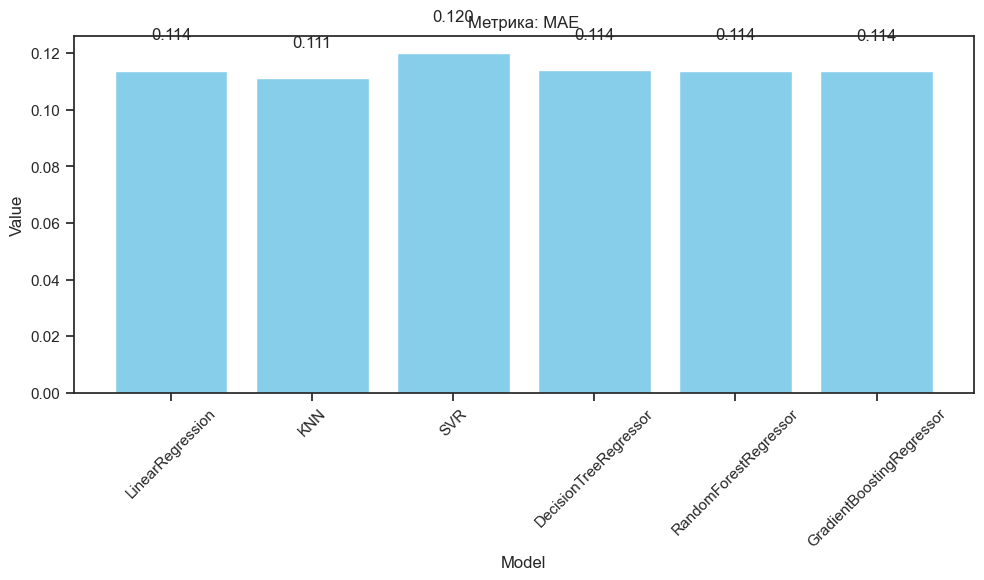

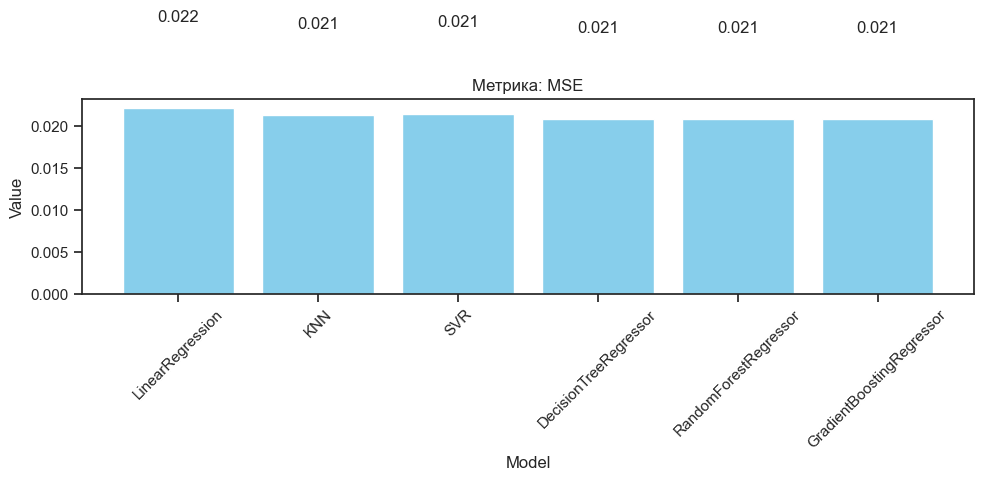

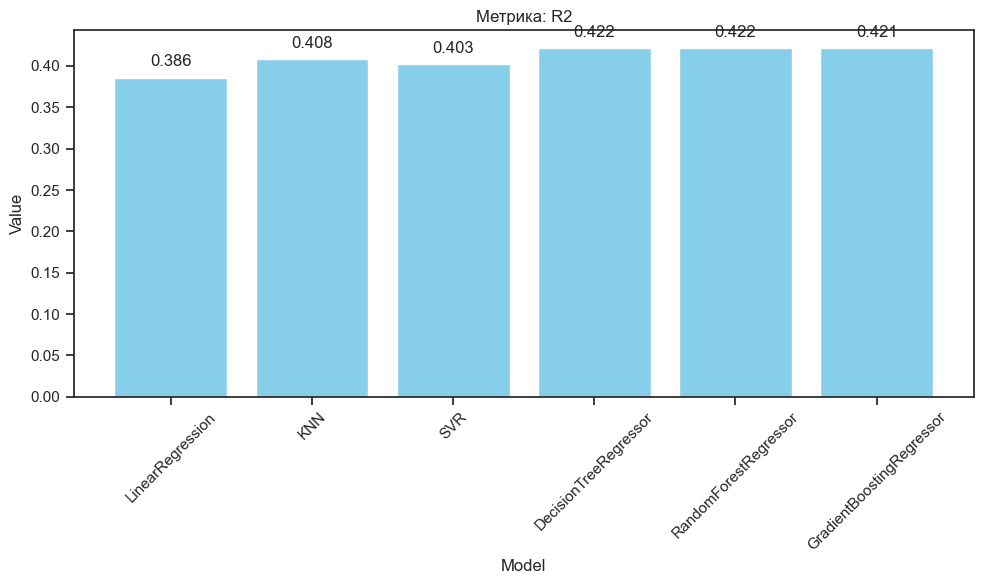

In [52]:
def plot_metric(regrMetricLogger, metric_name):
    # Фильтрация DataFrame для отображения только интересующей метрики
    filtered_df = regrMetricLogger[regrMetricLogger['Metric'] == metric_name][['Model', 'Value']]  # Изменено 'Metric'

    # Создание столбчатой диаграммы
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Model'], filtered_df['Value'], color='skyblue')

    # Добавление подписей к столбцам
    for i, value in enumerate(filtered_df['Value']):
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title(f'Метрика: {metric_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Создание DataFrame с метриками для лучших моделей
best_models_metrics = pd.DataFrame(
    {
        "Model": [
            "LinearRegression", 
            "KNN",
            "SVR",
            "DecisionTreeRegressor",
            "RandomForestRegressor",
            "GradientBoostingRegressor",
        ],
        "MAE": [mae_lr, mae_knn, mae_svr, mae_tree, mae_rf, mae_gb],
        "MSE": [mse_lr, mse_knn, mse_svr, mse_tree, mse_rf, mse_gb],
        "R2": [r2_lr,r2_knn, r2_svr, r2_tree, r2_rf, r2_gb],
    }
)
best_models_metrics = best_models_metrics.melt(
    id_vars="Model", var_name="Metric", value_name="Value"
)

# Построение графиков для лучших моделей
metrics = ["MAE", "MSE", "R2"]
for metric in metrics:
    plot_metric(best_models_metrics, metric)

# Лучше всего себя показали модели KNN, DecisionTreeRegressor и RandomForestRegressor